In [39]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# KNN

In [40]:
label = LabelEncoder()

In [41]:
df=pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\studies\machine learning\mlproject\Social_Network_Ads.csv")

In [42]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [43]:
df['Gender'] = label.fit_transform(df['Gender'])

In [44]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

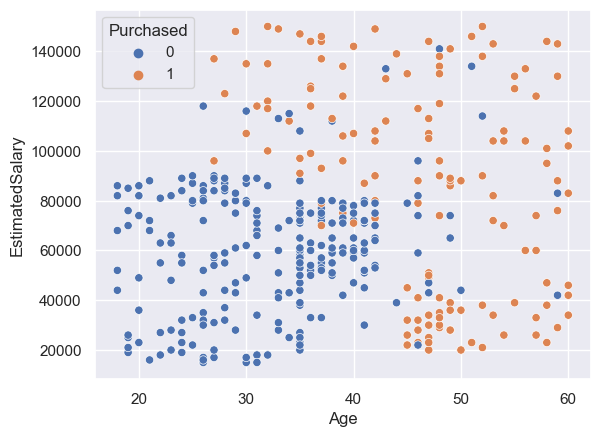

In [45]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased')

In [46]:
X = df.drop('Purchased',axis=1) 
y = df['Purchased']
print(X)
print(y)

      User ID  Gender  Age  EstimatedSalary
0    15624510       1   19            19000
1    15810944       1   35            20000
2    15668575       0   26            43000
3    15603246       0   27            57000
4    15804002       1   19            76000
..        ...     ...  ...              ...
395  15691863       0   46            41000
396  15706071       1   51            23000
397  15654296       0   50            20000
398  15755018       1   36            33000
399  15594041       0   49            36000

[400 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_train.head(10))

(320, 4)
(320,)
      User ID  Gender  Age  EstimatedSalary
205  15766609       0   47            47000
354  15699619       1   36            99000
3    15603246       0   27            57000
264  15600379       1   48            90000
194  15689751       1   28            89000
310  15717893       0   42            70000
284  15638646       1   48           141000
119  15701962       1   41            59000
385  15775335       1   56            60000
261  15680587       1   36           144000


In [48]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
print(scaled_X_train)
print(scaled_X_test)

[[ 1.01504705 -0.97530483  0.88928823 -0.65924556]
 [ 0.09481427  1.02532046 -0.17254846  0.87392651]
 [-1.22904891 -0.97530483 -1.04132394 -0.36440478]
 ...
 [-1.33919112 -0.97530483 -1.71703819 -1.36686344]
 [ 0.0682609   1.02532046 -0.84826272  0.31372902]
 [ 1.33382481  1.02532046 -0.84826272  2.31864634]]
[[ 1.29505937e+00 -9.75304830e-01 -8.48262720e-01  4.02181255e-01]
 [-1.63832515e+00 -9.75304830e-01 -1.62050759e+00 -1.57325199e+00]
 [-9.69078683e-01  1.02532046e+00 -7.60178540e-02 -4.82341092e-01]
 [-1.24104119e+00  1.02532046e+00 -8.48262720e-01  1.66308629e-01]
 [ 1.17657888e+00  1.02532046e+00  1.56500249e+00  1.88882376e-02]
 [-8.45611713e-01  1.02532046e+00  8.89288228e-01 -1.45531567e+00]
 [-5.23962950e-01 -9.75304830e-01 -1.42744637e+00  3.72697176e-01]
 [ 3.08298931e-01  1.02532046e+00 -9.44793328e-01 -1.10150673e+00]
 [-1.30015094e+00 -9.75304830e-01  2.13573971e-01 -2.75952545e-01]
 [ 1.40812753e+00 -9.75304830e-01 -1.72548462e-01  1.66999662e+00]
 [-1.49186267e+00 

In [49]:
# knn classifier and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [50]:
#prediction
ypre = knn.predict(scaled_X_test)

In [51]:
confusion_matrix(y_test,ypre) # y_test = actual output ypre = predicted output

array([[47,  1],
       [ 7, 25]], dtype=int64)

In [52]:
len(y_test)

80

In [53]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        48
           1       0.96      0.78      0.86        32

    accuracy                           0.90        80
   macro avg       0.92      0.88      0.89        80
weighted avg       0.91      0.90      0.90        80



In [54]:
print("the accuracy of knn",accuracy_score(y_test,ypre)*100)

the accuracy of knn 90.0


# SVM

In [55]:
import seaborn as sns
sns.set()
from scipy import stats

In [56]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [57]:
X = df.drop('Purchased', axis = 1).values
y = df['Purchased'].values.reshape((-1, 1))

In [58]:
#y=y.reshape(-1,1)
#y

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1,test_size=0.30)


print("X Train : ", xtrain.shape)
print("X Test  : ", xtest.shape)
print("Y Train : ", ytrain.shape)
print("Y Test  : ", ytest.shape)

X Train :  (280, 4)
X Test  :  (120, 4)
Y Train :  (280, 1)
Y Test  :  (120, 1)


In [60]:
from sklearn.svm import SVC

In [61]:
SVMclassifier = SVC(kernel = 'linear', random_state = 0)
SVMclassifier.fit(xtrain, ytrain)

C:\Users\santh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [62]:
y_pred = SVMclassifier.predict(xtest)

In [63]:
from sklearn import metrics

In [64]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[62 10]
 [28 20]]


In [65]:
SVM_acc1 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy Score of SVM is:",SVM_acc1*100)

Accuracy Score of SVM is: 68.33333333333333


In [66]:
#DT
#X = df.drop(columns="Purchased")           
#y = df["Purchased"]   


In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
#x_tr=np.reshape(X_train,(-1,1))
#x_te=np.reshape(X_test,(-1,1))
#y_tr=np.reshape(y_train,(-1,1))
#y_te=np.reshape(X_test,(-1,1))
#print(x_tr.shape)
#print(y_tr.shape)

In [68]:
#from sklearn.tree import DecisionTreeClassifier

In [69]:
#scaler = StandardScaler()
#scaled_x_train = scaler.fit_transform(X_train)
#scaled_x_test = scaler.transform(X_test)
#scaled_y_train = scaler.fit_transform(y_train)
#scaled_y_test = scaler.transform(y_test)
#print(scaled_x_train)
#print(scaled_x_test)


In [70]:
#DT
#DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 10,max_depth = 3, min_samples_leaf = 5)
#DTclassifier.fit(scaled_x_train, y_train)

In [71]:
#ypred = DTclassifier.predict(scaled_x_test)


In [72]:
#cm2= metrics.confusion_matrix(y_test, ypred)
#print(cm2)

In [73]:
#from sklearn import metrics 

In [74]:
#entropy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy score of entropy is: {entropy*100}")

In [75]:
#entropy = metrics.classification_report(y_test, y_pred)

In [76]:
"""  def importdata():
    balance_data = pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\studies\machine learning\mlproject\Social_Network_Ads.csv",sep= ',', header = None)
    label = LabelEncoder()
    # Printing the dataset shape
    print(balance_data)
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
    balance_data['Gender'] = label.fit_transform(df['Gender'])
    print(balance_data)
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("top 10 data in Dataset:\n ",balance_data.head(10))
    return balance_data
"""
  

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 55-56: truncated \UXXXXXXXX escape (3318788124.py, line 16)

In [ ]:
"""# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, :6]
    print(X)
    print(Y)
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.20, random_state = 10)
      
    return X, Y, X_train, X_test, y_train, y_test

""" 

In [ ]:
"""# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 10,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
    """

In [ ]:
"""# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 10,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
"""  

In [ ]:
"""
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
""" 

In [ ]:
"""
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred): # here ytest - actual output,ypred - predicted output
      
    print("Confusion Matrix:\n\n----------------\n ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy score: \n-----------------\n",
    accuracy_score(y_test,y_pred)*100)
      
    print("f1 score Report : \n-------------------\n",

classification_report(y_test, y_pred))
"""

In [ ]:
"""# Driver code
def main():
      
    # Building Phase
    data = importdata()
    
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    
    clf_gini = train_using_gini(X_train, X_test, y_train)
    
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()
    """

# KMC

In [78]:
dataset = pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\studies\machine learning\mlproject\Social_Network_Ads.csv") 
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [81]:
x = dataset.iloc[:, [2,3]].values  
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

C:\Users\santh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


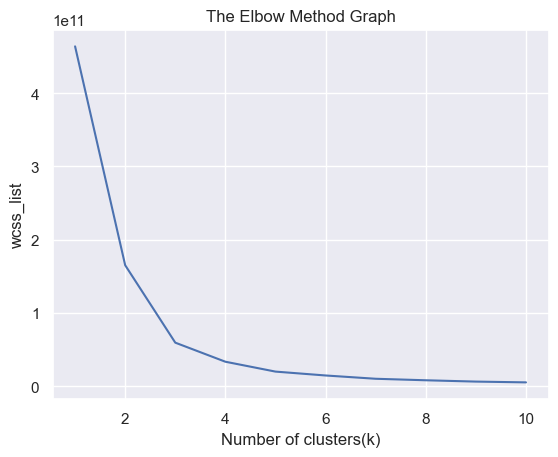

In [82]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [85]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

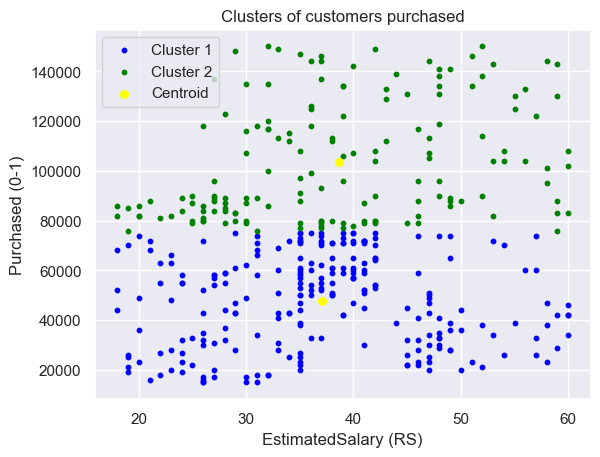

In [87]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster 
#plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers purchased')  
plt.xlabel('EstimatedSalary (RS)')  
plt.ylabel('Purchased (0-1)')  
plt.legend()  
plt.show()  